#######################################
# Made by : Charles Desrosiers-Gagnon #
# Last Update : february 13, 2024     #
#######################################

In [22]:
import numpy as np
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import data

In [23]:
#set path
PATH = ""
#open file
df = pd.read_excel(PATH,sheet_name="Donnees")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code                                        50 non-null     object 
 1   groups                                      50 non-null     int64  
 2   match                                       50 non-null     int64  
 3   sup                                         50 non-null     int64  
 4   Sex(F=0 M=1)                                50 non-null     int64  
 5   sex                                         50 non-null     object 
 6   TC                                          46 non-null     float64
 7   year of birth                               50 non-null     int64  
 8   dif_age                                     45 non-null     float64
 9   age                                         50 non-null     int64  
 10  weight          

Selecting & Cleaning data

In [25]:
# Only select float64 data categories will be kept as data will 50 no-null entry.

workSet = df.select_dtypes(exclude=['object'])

attributes = list(workSet.columns.values) # trunk manualy the attibute list to select the relevant ones 

In [26]:
workSet = workSet[['groups','Sex(F=0 M=1)','year of birth','age','weight','height','HTP','dyslipie','DIABETE','Pacemaker(Y=1)','Defibrilateur','LVEF_rest','NYHA',
                   'lasix_dose_day_mg','sprironolactone_dose_day_mg',
                    'BCC_dose_day_mg','ARNi_dose_day_mg', 'AntiPlaq_dose_day_mg','AntiCoag_dose_day_mg',
                    'Statine_dose_day_mg','BB_dose_day_mg','VO2_repos','VO2_max', '%_VO2_maxKg','VE_repos',
                    'VE_max','FC_repos','Fcmax','pente_VEVCO2','BSA','FCr','VO2Kg','ChrInd']]
workSet['AntiPlaq_dose_day_mg'] = workSet['AntiPlaq_dose_day_mg'].fillna(0) # the row with empty value in that case just indicate that the patient did not took that medication

#workSet = workSet[:-1] #drop last row
workSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   groups                       50 non-null     int64  
 1   Sex(F=0 M=1)                 50 non-null     int64  
 2   year of birth                50 non-null     int64  
 3   age                          50 non-null     int64  
 4   weight                       50 non-null     float64
 5   height                       50 non-null     float64
 6   HTP                          50 non-null     int64  
 7   dyslipie                     50 non-null     int64  
 8   DIABETE                      50 non-null     int64  
 9   Pacemaker(Y=1)               50 non-null     int64  
 10  Defibrilateur                50 non-null     int64  
 11  LVEF_rest                    50 non-null     int64  
 12  NYHA                         50 non-null     int64  
 13  lasix_dose_day_mg     

*Note Group 1 = systemic right ventricle || group 0 = systemic left ventricle*

In [27]:
# separate group and the data set
y = workSet['groups']
X = workSet.drop('groups', axis=1)


Standardisation

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)
x = pd.DataFrame(x)

Principal components analysis

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
#pca_x = pca.fit_transform(X)
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x)

How much each components explain the variance in this data sets

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance.sort()
explained_variance = explained_variance[::-1]
explained_variance

In [31]:
# number of components #
import numpy as np
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
# Get the list of attributes alreaddy establish :
feature_names = ['Sex(F=0 M=1)','year of birth','age','weight','height','HTP','dyslipie','DIABETE','Pacemaker(Y=1)','Defibrilateur','LVEF_rest','NYHA',
                   'lasix_dose_day_mg','sprironolactone_dose_day_mg',
                    'BCC_dose_day_mg','ARNi_dose_day_mg', 'AntiPlaq_dose_day_mg','AntiCoag_dose_day_mg',
                    'Statine_dose_day_mg','BB_dose_day_mg','VO2_repos','VO2_max', '%_VO2_maxKg','VE_repos',
                    'VE_max','FC_repos','Fcmax','pente_VEVCO2','BSA','FCr','VO2Kg','ChrInd']

# get the names
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}


In [32]:
# make dic a table 
table = pd.DataFrame(dic.items())
# changing names of colums
table = table.rename(columns={0: 'Keys', 1: 'Features'})
# adding variance to table
explained_variance = pd.DataFrame(explained_variance)
explained_variance[0]= explained_variance[0].apply(lambda x: format(x, 'f'))
explained_variance = explained_variance.rename(columns={0: 'Variance'})
table['Variance'] = explained_variance 

*Adding group labelling back*

In [33]:
table_features = list(table['Keys'].values)
pca_x.columns = table_features
pca_x['target']=y



Visualisation

In [56]:
#from mpl_toolkits.mplot3d import Axes3D
# to make an interactive plot
plt.rcParams['figure.figsize'] = [20, 20]

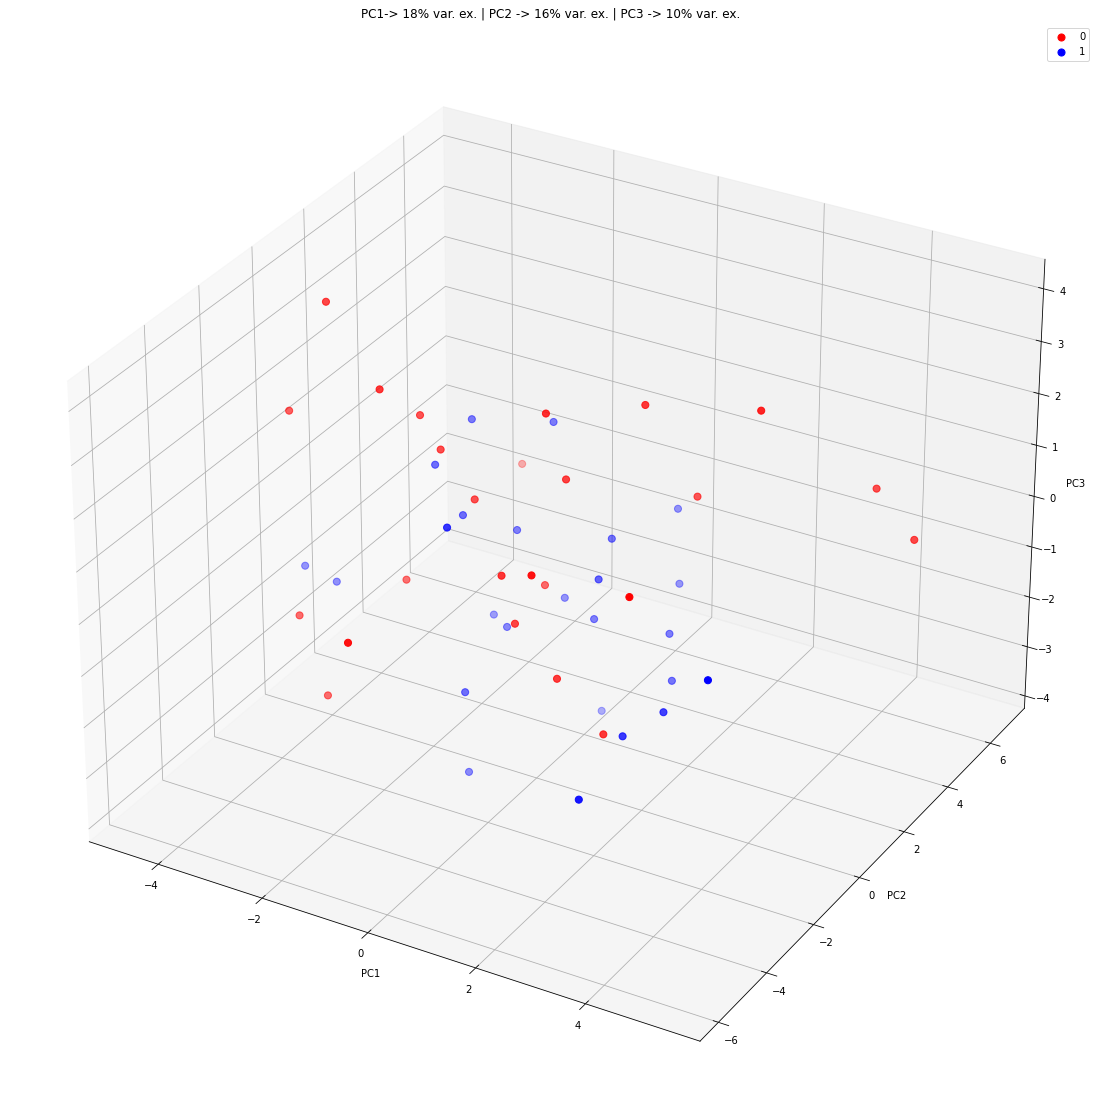

In [57]:
#set plot  pca_x['target']=y
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


#Giving a title and names to axes
#fig.suptitle("Difference between patients with a systemic right ventricle and a systemic left ventricle ") 
ax.set_title("PC1-> 18% var. ex. | PC2 -> 16% var. ex. | PC3 -> 10% var. ex.")


ax.set_xlabel(table['Keys'][0])
ax.set_ylabel(table['Keys'][1])
ax.set_zlabel(table['Keys'][2])

# Setting labels
targets = [0,1,2] # this will allow to plot the first 3 Principales components found
colors = ['r','b']

# Building the plot
for target, color in zip(targets,colors,):
    indicesToKeep = pca_x['target'] == target
 
    ax.scatter3D(pca_x.loc[indicesToKeep, 'PC1']
    , pca_x.loc[indicesToKeep, 'PC2']
    , pca_x.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50) 

ax.legend(targets)
ax.grid()
# #showing plot

#plt.show()



Export as 360 .gif file

In [58]:
from matplotlib.animation import PillowWriter

metadata = dict(title="Difference between patients with a systemic right ventricle and a systemic left ventricle",artist="CDG")
writer = PillowWriter(fps=15, metadata=metadata)


with writer.saving(fig, "PCAsRV.gif", dpi=100):
    for i in range(1, 180):
        ax.view_init(29,i+1)
        writer.grab_frame()
    #for i in range(-179, -108):
    #    ax.view_init(29,i+1)
    #    writer.grab_frame()
    
    # for i  in range(len(pca_x)):
    #     print(i)
    #     if i == len(pca_x) : 
    #         pcOne, pcTwo,pcThree = np.meshgrid(pca_x['PC1'][i], pca_x['PC2'][i],pca_x['PC3'][i]) 
           
    #         ax.scatter3D(pcOne, pcTwo, pcThree)
    #         writer.grab_frame()
    #     elif i == 0 :
    #         continue
    #     else :
    #         pcOne, pcTwo,pcThree = np.meshgrid(pca_x['PC1'][i], pca_x['PC2'][i],pca_x['PC3'][i]) 
            

    #         ax.scatter3D(pcOne, pcTwo, pcThree)
    #         writer.grab_frame() 